In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("pastel")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Set Aside Data before Inspecting it

In [3]:
X = df.drop(['quality'], axis = 1)
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8)

In [4]:
df = pd.merge(X_train, y_train, left_index = True, right_index = True, how = 'inner')
df['HighQuality'] = (df.quality >= 6).replace({False: 0, True: 1})
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1525            6.7              0.48         0.08             2.1      0.064   
1548           11.2              0.40         0.50             2.0      0.099   
887            10.7              0.52         0.38             2.6      0.066   
618            11.4              0.46         0.50             2.7      0.122   
190             8.2              0.50         0.35             2.9      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1525                 18.0                  34.0  0.99552  3.33       0.64   
1548                 19.0                  50.0  0.99783  3.10       0.58   
887                  29.0                  56.0  0.99577  3.15       0.79   
618                   4.0                  17.0  1.00060  3.13       0.70   
190                  21.0                 127.0  0.99760  3.23       0.62   

      alcohol  quality  HighQuality  
1525      9.7        5            0  
1548     10.4        5            0  
887      12.1        7            1  
618      10.2        5            0  
190       9.4        5            0

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
HighQuality             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 1525 to 110
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1279 non-null   float64
 1   volatile acidity      1279 non-null   float64
 2   citric acid           1279 non-null   float64
 3   residual sugar        1279 non-null   float64
 4   chlorides             1279 non-null   float64
 5   free sulfur dioxide   1279 non-null   float64
 6   total sulfur dioxide  1279 non-null   float64
 7   density               1279 non-null   float64
 8   pH                    1279 non-null   float64
 9   sulphates             1279 non-null   float64
 10  alcohol               1279 non-null   float64
 11  quality               1279 non-null   int64  
 12  HighQuality           1279 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 172.2 KB


In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1279.000000       1279.000000  1279.000000     1279.000000   
mean        8.333776          0.526919     0.272056        2.562236   
std         1.742303          0.181919     0.193718        1.452300   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.095000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1279.000000          1279.000000           1279.000000  1279.000000   
mean      0.087002            15.836200             45.968335     0.996733   
std       0.047272            10.401014             33.164466     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.500000     0.995580   
50%       0.079000            13.000000             37.000000     0.996720   
75%       0.089500            21.500000             61.000000     0.997800   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  HighQuality  
count  1279.000000  1279.000000  1279.000000  1279.000000  1279.000000  
mean      3.310758     0.656990    10.443901     5.640344     0.532447  
std       0.152821     0.168127     1.065726     0.812923     0.499141  
min       2.740000     0.330000     8.500000     3.000000     0.000000  
25%       3.210000     0.550000     9.500000     5.000000     0.000000  
50%       3.310000     0.620000    10.200000     6.000000     1.000000  
75%       3.400000     0.730000    11.100000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     8.000000     1.000000

In [8]:
df.groupby('quality').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             7.933333          0.985833     0.081667        3.025000   
4             7.702128          0.693191     0.166596        2.725532   
5             8.204954          0.575468     0.244752        2.552385   
6             8.357746          0.497525     0.276076        2.488833   
7             8.846784          0.402895     0.373918        2.724269   
8             8.538462          0.433846     0.392308        2.846154   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.135333            11.500000             20.833333  0.996898   
4         0.091915            12.361702             35.212766  0.996497   
5         0.092191            16.666055             55.237615  0.997108   
6         0.084002            15.801811             40.822938  0.996596   
7         0.077474            14.578947             36.175439  0.996096   
8         0.069462            13.461538             33.384615  0.995412   

               pH  sulphates    alcohol  HighQuality  
quality                                               
3        3.451667   0.553333  10.416667          0.0  
4        3.386809   0.602553  10.277660          0.0  
5        3.301046   0.621156   9.912936          0.0  
6        3.319899   0.673581  10.645674          1.0  
7        3.291696   0.732456  11.464620          1.0  
8        3.279231   0.776923  12.176923          1.0

In [9]:
group = df.groupby('HighQuality').mean()
group.drop('quality', axis = 1, inplace = True)
group

fixed acidity  volatile acidity  citric acid  residual sugar  \
HighQuality                                                                 
0                 8.162709          0.588838     0.236973        2.570736   
1                 8.483994          0.472548     0.302863        2.554772   

             chlorides  free sulfur dioxide  total sulfur dioxide   density  \
HighQuality                                                                   
0             0.092602            16.275920             53.318562  0.997058   
1             0.082085            15.450073             39.513950  0.996448   

                   pH  sulphates    alcohol  
HighQuality                                  
0            3.309298   0.619013   9.946656  
1            3.312041   0.690338  10.880543

In [10]:
df.quality.value_counts()

5    545
6    497
7    171
4     47
8     13
3      6
Name: quality, dtype: int64

# Visual Exploration

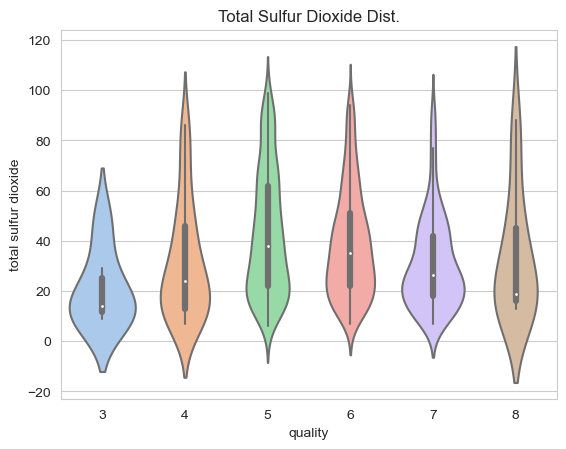

In [11]:
sns.violinplot(data = df[df['total sulfur dioxide'] < 100], x = 'quality', y = 'total sulfur dioxide')

plt.title('Total Sulfur Dioxide Dist.')
plt.show()

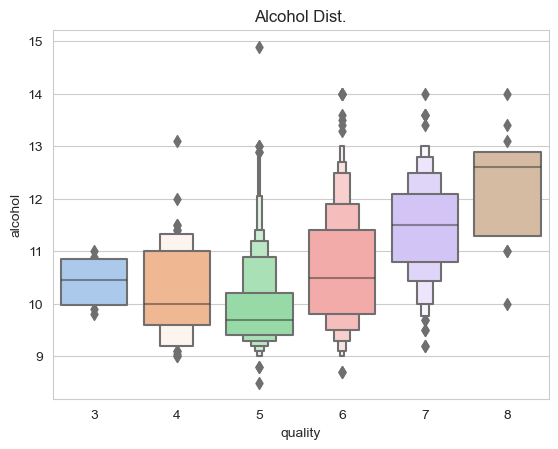

In [12]:
sns.boxenplot(data = df, x = 'quality', y = 'alcohol')

plt.title('Alcohol Dist.')
plt.show()

# Statistical Tests

In [13]:
def perm_fun(df, col, len_a):
    a = df.sample(n = len_a, replace = False)
    b = df[~df.index.isin(a.index)]
    
    return a[col].mean() - b[col].mean()

In [14]:
def generate_diffs_and_graph(col, len_a, df):
    # generated permuted differences
    actual_diff = group.loc[1][col] - group.loc[0][col]
    diffs = [perm_fun(df, col, len_a) for _ in range(1000)]
    
    # plot permuted differences and actual difference
    plt.figure(figsize = (5,4))
    sns.histplot(diffs)
    plt.axvline(x = actual_diff, color = 'red')
    plt.title(f"Perm Test (statistical significance) for {col}")
    plt.show()

    # calculate and print p-val for statistical significance test
    p_val = [np.abs(diff) > np.abs(actual_diff) for diff in diffs]
    p_val = np.array(p_val).mean()
    print("p-val:", p_val)
    
    return p_val

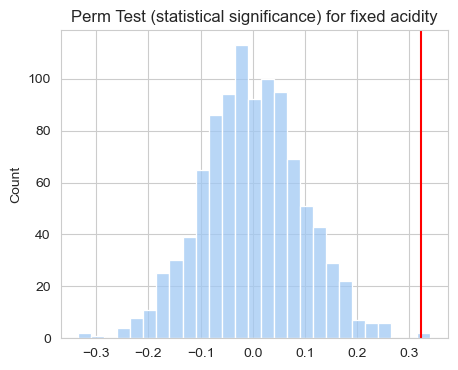

p-val: 0.003


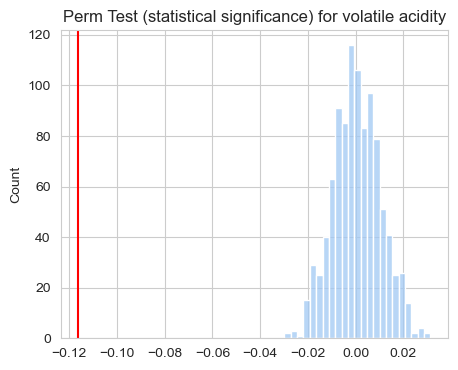

p-val: 0.0


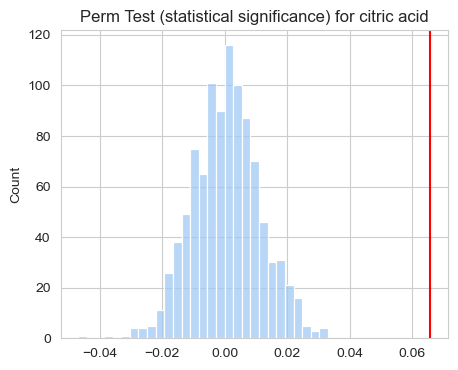

p-val: 0.0


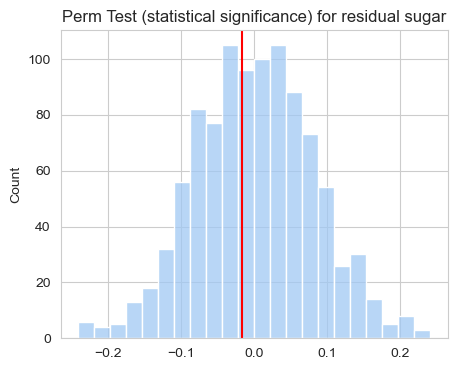

p-val: 0.853


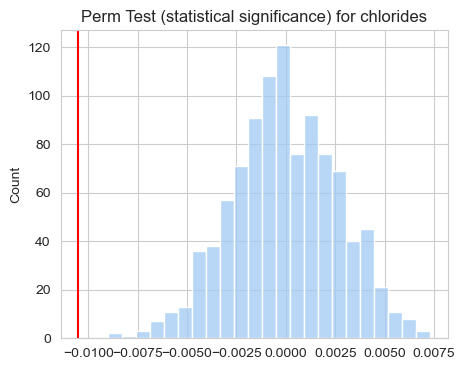

p-val: 0.0


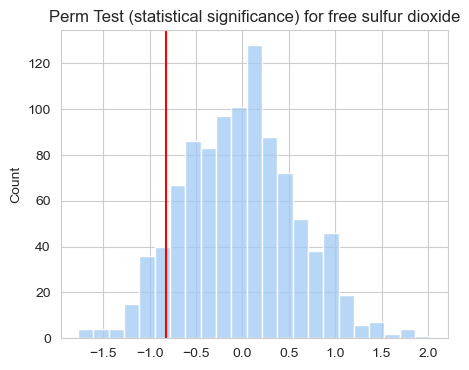

p-val: 0.181


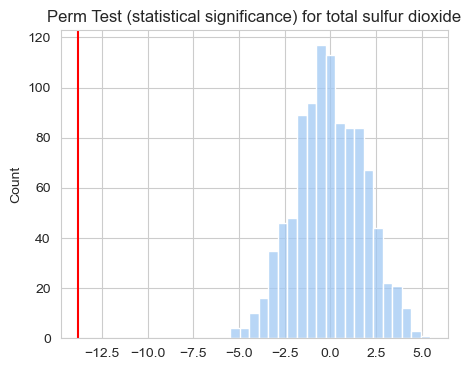

p-val: 0.0


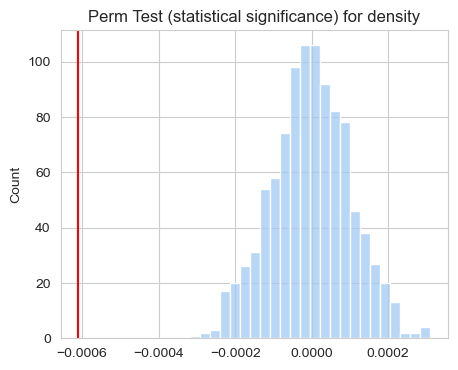

p-val: 0.0


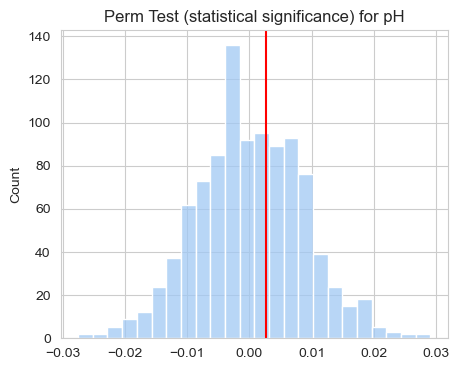

p-val: 0.755


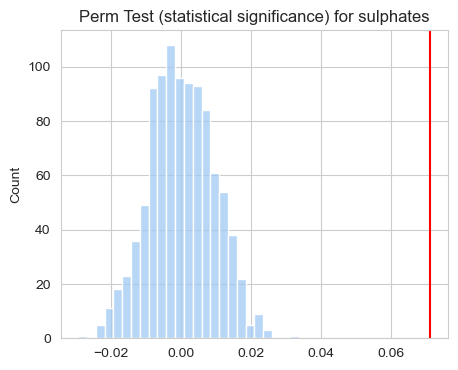

p-val: 0.0


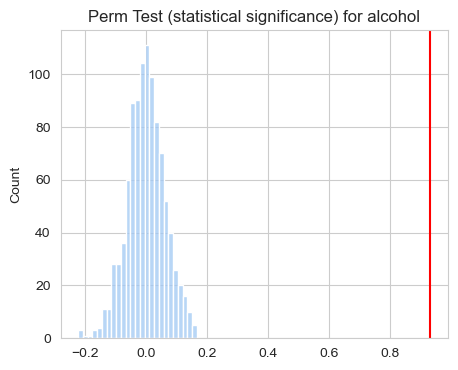

p-val: 0.0


In [15]:
significant_vars = []
len_a = df.HighQuality.value_counts().loc[1]

for col in group.columns:
    p_val = generate_diffs_and_graph(col, len_a, df)
    if (p_val <= .05):
        significant_vars.append(col)

In [16]:
significant_vars

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

# Train Models

In [17]:
X_train = df[significant_vars]
y_train = df.quality

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Grid Search

In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [5,10,20]
}

In [19]:
rf_grid = GridSearchCV(rf, param_grid = param_grid, cv = 5, scoring = 'accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [20]:
cvres = rf_grid.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.5879564950980393 {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
0.5895189950980393 {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}
0.5871752450980392 {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300}
0.5910814950980392 {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.5840441176470588 {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200}
0.5918596813725491 {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.5809252450980392 {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.5879503676470588 {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 200}
0.5871691176470588 {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 300}
0.6075061274509804 {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
0.6106341911764706 {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
0.6020343137254902 {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
0.5973406862745099 {'m

In [21]:
best_params = rf_grid.best_params_
best_params

{'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}

In [22]:
rf_tuned = rf_grid.best_estimator_
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=5)

# XGBoost

In [23]:
xgb = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5 ,7],
    'eta': [.05, .1, .3]
}

# resetting y so that it will work for xgboost
y_train_xgb = y_train - 3

xgb_grid = GridSearchCV(xgb, param_grid = param_grid, cv = 5, scoring = 'accuracy')
xgb_grid.fit(X_train, y_train_xgb)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=No

In [24]:
cvres = xgb_grid.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.5965808823529412 {'eta': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.6067279411764706 {'eta': 0.05, 'max_depth': 3, 'n_estimators': 200}
0.6145557598039215 {'eta': 0.05, 'max_depth': 3, 'n_estimators': 300}
0.624718137254902 {'eta': 0.05, 'max_depth': 5, 'n_estimators': 100}
0.6356525735294117 {'eta': 0.05, 'max_depth': 5, 'n_estimators': 200}
0.650499387254902 {'eta': 0.05, 'max_depth': 5, 'n_estimators': 300}
0.6372150735294118 {'eta': 0.05, 'max_depth': 7, 'n_estimators': 100}
0.6372058823529412 {'eta': 0.05, 'max_depth': 7, 'n_estimators': 200}
0.6442371323529412 {'eta': 0.05, 'max_depth': 7, 'n_estimators': 300}
0.607515318627451 {'eta': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.6215808823529412 {'eta': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.6379901960784313 {'eta': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.6395435049019608 {'eta': 0.1, 'max_depth': 5, 'n_estimators': 100}
0.6442432598039216 {'eta': 0.1, 'max_depth': 5, 'n_estimators': 200}
0.6418964460784313 {'eta': 0

In [25]:
xgb_tuned = xgb_grid.best_estimator_
xgb_tuned.fit(X_train, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# Make Predictions

In [26]:
df_test = pd.merge(X_test, y_test, left_index = True, right_index = True, how = 'inner')
df_test['RFPred'] = rf.predict(X_test[significant_vars])
df_test['RFTunedPred'] = rf.predict(X_test[significant_vars])

# xgboost predictions
df_test['XGBPred'] = xgb_tuned.predict(X_test[significant_vars])
df_test.XGBPred = df_test.XGBPred + 3 # xgboost was trained on y value range 0:5 instead of 3:8


df_test

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
105             8.1             0.575         0.22             2.1      0.077   
1296            6.6             0.630         0.00             4.3      0.093   
375            11.5             0.540         0.71             4.4      0.124   
308            10.3             0.430         0.44             2.4      0.214   
551             9.4             0.430         0.24             2.8      0.092   
...             ...               ...          ...             ...        ...   
799             9.4             0.500         0.34             3.6      0.082   
1371            7.5             0.580         0.56             3.1      0.153   
140             8.4             0.745         0.11             1.9      0.090   
96              6.8             0.775         0.00             3.0      0.102   
1539            7.2             0.390         0.32             1.8      0.065   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
105                  12.0                  65.0  0.99670  3.29       0.51   
1296                 51.0                  77.5  0.99558  3.20       0.45   
375                   6.0                  15.0  0.99840  3.01       0.83   
308                   5.0                  12.0  0.99940  3.19       0.63   
551                  14.0                  45.0  0.99800  3.19       0.73   
...                   ...                   ...      ...   ...        ...   
799                   5.0                  14.0  0.99870  3.29       0.52   
1371                  5.0                  14.0  0.99476  3.21       1.03   
140                  16.0                  63.0  0.99650  3.19       0.82   
96                    8.0                  23.0  0.99650  3.45       0.56   
1539                 34.0                  60.0  0.99714  3.46       0.78   

      alcohol  quality  RFPred  RFTunedPred  XGBPred  
105       9.2        5       5            5        5  
1296      9.5        5       5            5        5  
375      11.8        7       7            7        7  
308       9.5        6       6            6        6  
551      10.0        6       6            6        6  
...       ...      ...     ...          ...      ...  
799      10.7        6       6            6        6  
1371     11.6        6       6            6        6  
140       9.6        5       5            5        5  
96       10.7        5       6            6        6  
1539      9.9        5       6            6        6  

[320 rows x 15 columns]

# Access Model Accuracy

In [27]:
rf_tuned_accuracy = accuracy_score(df_test.quality, df_test.RFTunedPred)
rf_accuracy = accuracy_score(df_test.quality, df_test.RFPred)
xgb_accuracy = accuracy_score(df_test.quality, df_test.XGBPred)

In [28]:
scores = pd.DataFrame(data = [rf_accuracy, rf_tuned_accuracy, xgb_accuracy], 
                      index = ['Random Forest Classifier', 'Random Forest w/GridSearch', 'XGBoost'],
                      columns = ['Accuracy Score'])
scores = np.round(scores * 100, 2)
scores

Accuracy Score
Random Forest Classifier             72.50
Random Forest w/GridSearch           72.50
XGBoost                              70.31